In [2]:
import feyn
from feyn.plots.interactive import interactive_activation_flow
from feyn.tools import split

import pandas as pd

from sklearn.metrics import root_mean_squared_error

This version of Feyn and the QLattice is available for academic, personal, and non-commercial use. By using the community version of this software you agree to the terms and conditions which can be found at https://abzu.ai/eula.

KeyboardInterrupt: 

In [ ]:
df = pd.read_csv("/Users/admin/Downloads/parklane_combined_edited.csv")

In [ ]:
# fill NaN cells with 0
df.fillna(0)

,timestamp,sys_kw,sys_cl,sys_hr,sys_hb,sys_eff,ch_sysef,air_eff,h_chwst,h_chwrt,...,ahu_ilp_1_ph,ahu_ilp_1_mvp,ahu_ilp_1_fl,ahu_ilp_1_freq,ahu_ilp_1_rpm,ahu_ilp_2_ph,ahu_ilp_2_mvp,ahu_ilp_2_fl,ahu_ilp_2_freq,ahu_ilp_2_rpm
0,3/12/2023 0:00,0.693672,0.032793,0.0,0.0,31.291697,22.072638,9.275530,18.472595,20.528137,...,0.0,27.560001,0.0,0.0,0.0,0.0,27.560001,0.0,0.0,0.0
1,3/12/2023 0:01,0.707719,0.033077,0.0,0.0,32.503700,21.382240,8.901477,18.464382,20.534977,...,0.0,27.560001,0.0,0.0,0.0,0.0,27.560001,0.0,0.0,0.0
2,3/12/2023 0:02,0.716781,0.032619,0.0,0.0,30.604588,21.109730,8.676921,18.491760,20.536346,...,0.0,27.560001,0.0,0.0,0.0,0.0,27.560001,0.0,0.0,0.0
3,3/12/2023 0:03,0.695813,0.031427,0.0,0.0,30.649281,22.140791,9.313333,18.480808,20.534977,...,0.0,27.560001,0.0,0.0,0.0,0.0,27.560001,0.0,0.0,0.0
4,3/12/2023 0:04,0.712188,0.033932,0.0,0.0,28.393875,21.863008,9.105909,18.484915,20.536346,...,0.0,27.560001,0.0,0.0,0.0,0.0,27.560001,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727652,2/7/2024 23:55,0.659313,0.014084,0.0,0.0,69.313881,48.457237,21.396702,12.612066,13.368400,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
727653,2/7/2024 23:56,0.647156,0.013102,0.0,0.0,73.751755,49.394348,21.862408,12.614863,13.360059,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
727654,2/7/2024 23:57,0.644875,0.013533,0.0,0.0,69.183479,47.650959,21.327015,12.617662,13.382298,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
727655,2/7/2024 23:58,0.655438,0.013829,0.0,0.0,66.936768,47.395973,21.024706,12.621859,13.397586,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [ ]:
# filter where hr or hb is  not 0
df = df[(df['sys_hr'] != 0) | (df['sys_hb'] != 0)]
df = df[(df['h_chwst'] >=5) & (df['h_chwst'] <=20)]
df = df[(df['h_chwrt'] >=5) & (df['h_chwrt'] <=25)]
df = df[(df['pchwp_1_kw'] >=0.1) & (df['pchwp_1_kw'] <=25)]
#df = df[(df['pchwp_2_kw'] >=0) & (df['pchwp_2_kw'] <=25)]
df = df[(df['h_chwf'] >= 0) & (df['h_chwf'] <= 1500)]
df = df[(df['cwp_1_kw'] >= 0) & (df['cwp_1_kw'] <=25)]
df = df[(df['cwp_2_kw'] >= 0) & (df['cwp_2_kw'] <=25)]
df = df[(df['h_chwf'] >=0) & (df['h_chwf'] <=1500)]
df = df[(df['h_cwst']>=20) & (df['h_cwst']<=32)]
df = df[(df['h_cwrt']>=20) & (df['h_cwrt']<=40)]
df = df[(df['ch_1_kwe']>=1) & (df['ch_1_kwe']<=350)]
df = df[(df['ch_2_kwe']>=1) & (df['ch_2_kwe']<=350)]
df = df[(df['ct_1_kw']>=7) & (df['ct_1_kw']<=15)]
df = df[(df['ct_2_kw']>=7) & (df['ct_2_kw']<=15)]
df = df[(df['sys_cl']>=350) & (df['sys_cl']<=600)]
df = df[(df['sys_hr']>=0) & (df['sys_hr']<=1000)]
df = df[(df['sys_kw']>=0) & (df['sys_kw']<=400)]
fil_df = df[(df['ch_sysef']>=0.3) & (df['ch_sysef']<=0.8)]

# creating Lift Column, Lift: [h_cwrt-h_chwst]
fil_df['lift'] = fil_df['h_cwrt'] - fil_df['h_chwst']
# combining total power input of both chillers
fil_df['ct_tot_kw'] = fil_df['ct_1_kw'] + fil_df['ct_2_kw']

fil_df = fil_df.reset_index()


/var/folders/zj/qh6k8b392r109tcjhtspn0lh0000gp/T/ipykernel_6100/4043341210.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fil_df['lift'] = fil_df['h_cwrt'] - fil_df['h_chwst']
/var/folders/zj/qh6k8b392r109tcjhtspn0lh0000gp/T/ipykernel_6100/4043341210.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fil_df['ct_tot_kw'] = fil_df['ct_1_kw'] + fil_df['ct_2_kw']


In [15]:
fil_df.ch_1_kwe.describe()

NameError: name 'fil_df' is not defined

In [ ]:
ch_sysef_df = fil_df[['ch_sysef', 'lift', 'sys_cl', 'ct_tot_kw']]

ch_sysef_df.head(5)

,ch_sysef,lift,sys_cl,ct_tot_kw
0,0.387167,7.367701,127.538132,3.508719
1,0.308619,7.805637,152.515945,3.477781
2,0.391576,8.073826,126.885735,7.184000
3,0.550531,8.440350,107.953125,7.088001
4,0.467190,9.664524,155.478806,7.152000


In [ ]:
ch_sysef_df

,ch_sysef,lift,sys_cl,ct_tot_kw
0,0.387167,7.367701,127.538132,3.508719
1,0.308619,7.805637,152.515945,3.477781
2,0.391576,8.073826,126.885735,7.184000
3,0.550531,8.440350,107.953125,7.088001
4,0.467190,9.664524,155.478806,7.152000
...,...,...,...,...
241153,0.587990,22.779400,225.187408,4.192000
241154,0.542650,22.345276,267.445557,4.096000
241155,0.441344,23.262364,278.024445,4.176000
241156,0.314315,22.907557,238.448334,4.024000


In [ ]:
#random sampling of 150000 samples
ch_sysef_df.sample(n=150000, random_state=1)

,ch_sysef,lift,sys_cl,ct_tot_kw
58397,0.557003,24.131072,377.341400,6.976000
108538,0.523398,22.440311,279.013977,4.352000
149880,0.555712,24.133652,286.667633,24.384002
127668,0.507784,22.454852,297.538696,8.384001
66331,0.531652,23.997277,253.819687,6.864001
...,...,...,...,...
73349,0.559597,24.768705,363.820190,6.912000
109259,0.584318,24.323235,384.484558,18.688002
50057,0.565698,23.307590,352.893951,9.216001
5192,0.543724,23.548816,352.037079,7.008001


<?xml version="1.0" encoding="utf-8" ?>
<svg baseProfile="full" height="352.0" preserveAspectRatio="none" version="1.1" viewBox="0 0 875 352.0" width="875" xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><svg class="graph" height="275.0" width="591" x="0" y="0"><defs /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="481" y="110.0"><title>ch_sysef
linear:
scale=0.249585
scale offset=0.000000
w=0.686235
bias=1.8641</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="526.0" y="131.5">ch_sysef</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="569" y="119.0">0</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="483" y="119.0">out</text><line stroke="#1E1E1E" x1="451" x2="481" y1="127.5" y2="127.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="361" y="110.0"><title>gaussian</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="406.0" y="131.5">gaussian</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="449" y="119.0">1</text><line stroke="#1E1E1E" x1="331" x2="361" y1="97.5" y2="118.5" /><line stroke="#1E1E1E" x1="331" x2="361" y1="157.5" y2="136.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="241" y="80.0"><title>add</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="286.0" y="101.5">add</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="329" y="89.0">2</text><line stroke="#1E1E1E" x1="211" x2="241" y1="37.5" y2="88.5" /><line stroke="#1E1E1E" x1="211" x2="241" y1="97.5" y2="106.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="121" y="20.0"><title>gaussian</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="166.0" y="41.5">gaussian</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="209" y="29.0">3</text><line stroke="#1E1E1E" x1="91" x2="121" y1="97.5" y2="28.5" /><line stroke="#1E1E1E" x1="91" x2="121" y1="157.5" y2="46.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="80.0"><title>ct_tot_kw
linear:
scale=0.080541
scale offset=11.278771
w=0.175026
bias=0.3719</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="46.0" y="101.5">ct_tot_kw</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="89" y="89.0">4</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="3" y="89.0">num</text><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="140.0"><title>lift
linear:
scale=0.082215
scale offset=23.544833
w=1.060507
bias=-0.6859</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="46.0" y="161.5">lift</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="89" y="149.0">5</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="3" y="149.0">num</text><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="121" y="80.0"><title>ct_tot_kw
linear:
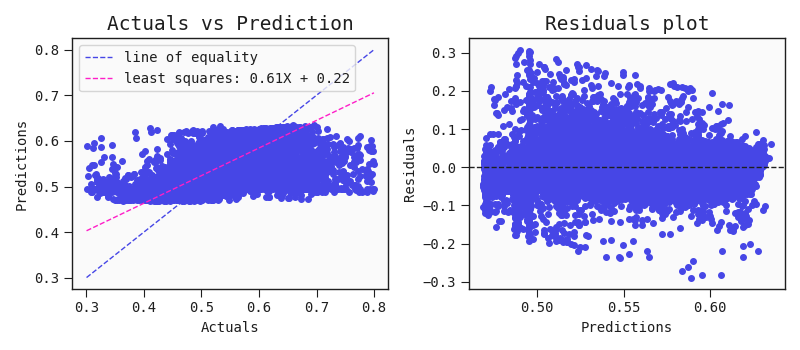
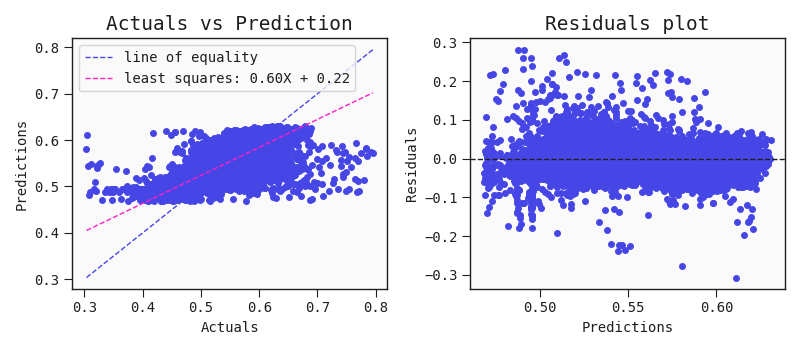

In [ ]:
train, test = split(ch_sysef_df, ratio=[0.8, 0.2], random_state=42)

ql = feyn.QLattice(random_seed=42)

models = ql.sample_models(train.columns, 'ch_sysef', max_complexity=10)

models = feyn.fit_models(models, train, 'absolute_error', 'bic')

models = feyn.prune_models(models)

models = feyn.get_diverse_models(
    models=models,
    n=5
)

best = models[0]
best.plot(
    data=train,
    compare_data=test
)


In [ ]:
root_mean_squared_error(test['ch_sysef'], best.predict(test)) 

0.028037386084431532

In [ ]:
interactive_activation_flow(best, train)

interactive(children=(FloatSlider(value=12.416, description='ct_tot_kw', max=24.832), FloatSlider(value=17.150…

<function feyn.plots.interactive._graph_flow.interactive_activation_flow.<locals>.flow(**kwargs)>

In [ ]:
len(fil_df)

241158

## Condition for Summer, Rain, Normal Model

RH > 90% AND DB < 26 C as rainy days 
RH < 70% AND DB > 30C as hot days
other conditions as normal days? 

In [ ]:
# Summer
summer_fil_df = fil_df[(fil_df['wea_ct_rh']<=70) & (fil_df['wea_ct_db']>=30)]

# Rain
rain_fil_df = fil_df[(fil_df['wea_ct_rh']>=90) & (fil_df['wea_ct_db']<=26)]

# Normal
cond1 = fil_df['timestamp'].isin(summer_fil_df['timestamp'])
cond2 = fil_df['timestamp'].isin(rain_fil_df['timestamp'])
fil_df.drop(fil_df[cond1].index, inplace=True)
fil_df.drop(fil_df[cond2].index, inplace=True)

/var/folders/zj/qh6k8b392r109tcjhtspn0lh0000gp/T/ipykernel_6100/2566096721.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fil_df.drop(fil_df[cond2].index, inplace=True)


## Summer model

<?xml version="1.0" encoding="utf-8" ?>
<svg baseProfile="full" height="352.0" preserveAspectRatio="none" version="1.1" viewBox="0 0 1115 352.0" width="1115" xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><svg class="graph" height="275.0" width="831" x="0" y="0"><defs /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="721" y="110.0"><title>ch_sysef
linear:
scale=0.249585
scale offset=0.000000
w=1.674589
bias=1.7532</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="766.0" y="131.5">ch_sysef</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="809" y="119.0">0</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="723" y="119.0">out</text><line stroke="#1E1E1E" x1="691" x2="721" y1="127.5" y2="127.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="601" y="110.0"><title>gaussian</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="646.0" y="131.5">gaussian</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="689" y="119.0">1</text><line stroke="#1E1E1E" x1="571" x2="601" y1="97.5" y2="118.5" /><line stroke="#1E1E1E" x1="571" x2="601" y1="157.5" y2="136.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="481" y="80.0"><title>lift
linear:
scale=0.084768
scale offset=23.537026
w=-0.444846
bias=0.7455</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="526.0" y="101.5">lift</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="569" y="89.0">2</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="483" y="89.0">num</text><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="481" y="140.0"><title>multiply</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="526.0" y="161.5">multiply</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="569" y="149.0">3</text><line stroke="#1E1E1E" x1="451" x2="481" y1="97.5" y2="148.5" /><line stroke="#1E1E1E" x1="451" x2="481" y1="157.5" y2="166.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="361" y="80.0"><title>gaussian</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="406.0" y="101.5">gaussian</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="449" y="89.0">4</text><line stroke="#1E1E1E" x1="331" x2="361" y1="67.5" y2="97.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="241" y="50.0"><title>add</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="286.0" y="71.5">add</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="329" y="59.0">5</text><line stroke="#1E1E1E" x1="211" x2="241" y1="37.5" y2="58.5" /><line stroke="#1E1E1E" x1="211" x2="241" y1="97.5" y2="76.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="121" y="20.0"><title>sys_cl
linear:
scale=0.003347
scale offset=336.410309
w=-0.320519
bias=-0.6333</title></rect><text fill="#1E1E1E" font-family="monospace" font-s
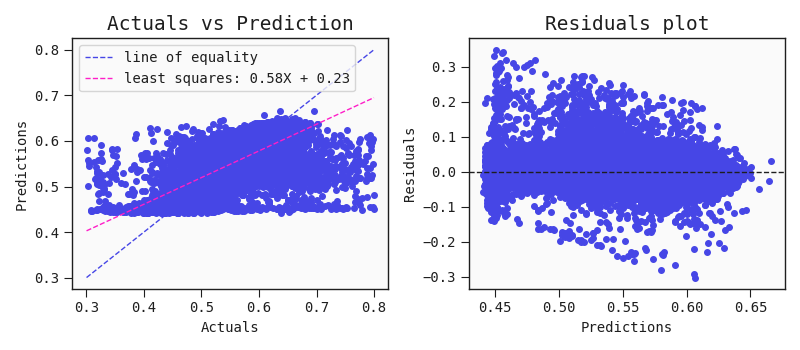
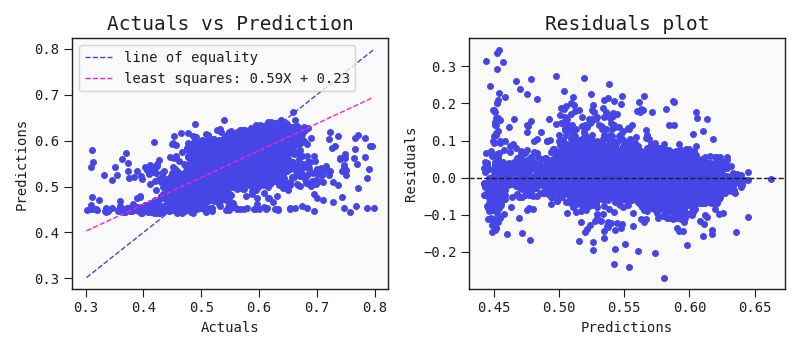

In [ ]:
summer_ch_sysef_df = summer_fil_df[['ch_sysef', 'lift', 'sys_cl', 'ct_tot_kw']]

summer_train, summer_test = split(summer_ch_sysef_df, ratio=[0.8, 0.2], random_state=42)

ql = feyn.QLattice(random_seed=42)

models = ql.sample_models(summer_train.columns, 'ch_sysef', max_complexity=15)

models = feyn.fit_models(models, train, 'absolute_error', 'bic')

models = feyn.prune_models(models)

models = feyn.get_diverse_models(
    models=models,
    n=10
)

summer_model = models[0]
summer_model.plot(
    data=train,
    compare_data=test
)

In [ ]:
root_mean_squared_error(summer_test['ch_sysef'], summer_model.predict(summer_test)) * 100

2.2850653776782726

In [ ]:
interactive_activation_flow(summer_model, summer_train)

interactive(children=(FloatSlider(value=19.5145895, description='lift', max=29.313423999999998, min=9.71575500…

<function feyn.plots.interactive._graph_flow.interactive_activation_flow.<locals>.flow(**kwargs)>

## Rain model

<?xml version="1.0" encoding="utf-8" ?>
<svg baseProfile="full" height="352.0" preserveAspectRatio="none" version="1.1" viewBox="0 0 1115 352.0" width="1115" xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><svg class="graph" height="275.0" width="831" x="0" y="0"><defs /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="721" y="110.0"><title>ch_sysef
linear:
scale=0.249585
scale offset=0.000000
w=1.674589
bias=1.7532</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="766.0" y="131.5">ch_sysef</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="809" y="119.0">0</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="723" y="119.0">out</text><line stroke="#1E1E1E" x1="691" x2="721" y1="127.5" y2="127.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="601" y="110.0"><title>gaussian</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="646.0" y="131.5">gaussian</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="689" y="119.0">1</text><line stroke="#1E1E1E" x1="571" x2="601" y1="97.5" y2="118.5" /><line stroke="#1E1E1E" x1="571" x2="601" y1="157.5" y2="136.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="481" y="80.0"><title>lift
linear:
scale=0.084768
scale offset=23.537026
w=-0.444846
bias=0.7455</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="526.0" y="101.5">lift</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="569" y="89.0">2</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="483" y="89.0">num</text><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="481" y="140.0"><title>multiply</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="526.0" y="161.5">multiply</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="569" y="149.0">3</text><line stroke="#1E1E1E" x1="451" x2="481" y1="97.5" y2="148.5" /><line stroke="#1E1E1E" x1="451" x2="481" y1="157.5" y2="166.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="361" y="80.0"><title>gaussian</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="406.0" y="101.5">gaussian</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="449" y="89.0">4</text><line stroke="#1E1E1E" x1="331" x2="361" y1="67.5" y2="97.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="241" y="50.0"><title>add</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="286.0" y="71.5">add</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="329" y="59.0">5</text><line stroke="#1E1E1E" x1="211" x2="241" y1="37.5" y2="58.5" /><line stroke="#1E1E1E" x1="211" x2="241" y1="97.5" y2="76.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="121" y="20.0"><title>sys_cl
linear:
scale=0.003347
scale offset=336.410309
w=-0.320519
bias=-0.6333</title></rect><text fill="#1E1E1E" font-family="monospace" font-s
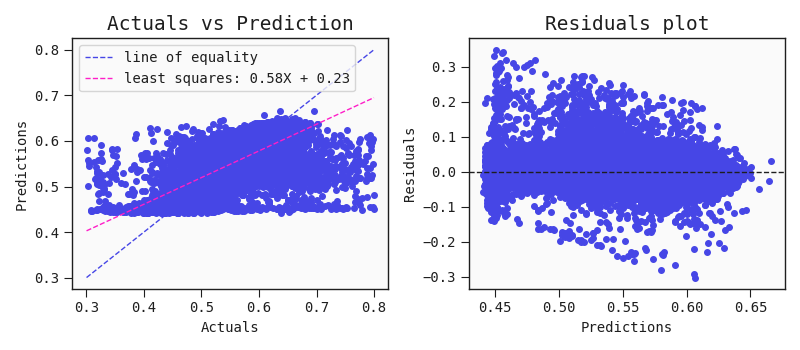
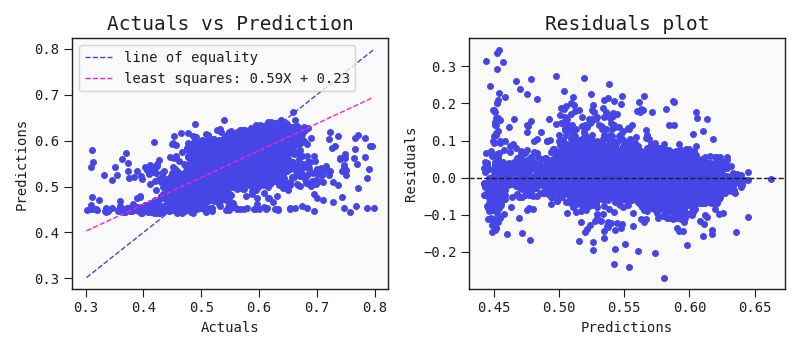

In [ ]:
rain_ch_sysef_df = rain_fil_df[['ch_sysef', 'lift', 'sys_cl', 'ct_tot_kw']]

rain_train, rain_test = split(rain_ch_sysef_df, ratio=[0.8, 0.2], random_state=42)

ql = feyn.QLattice(random_seed=42)

models = ql.sample_models(rain_train.columns, 'ch_sysef', max_complexity=15)

models = feyn.fit_models(models, train, 'absolute_error', 'bic')

models = feyn.prune_models(models)

models = feyn.get_diverse_models(
    models=models,
    n=10
)

rain_model = models[0]
rain_model.plot(
    data=train,
    compare_data=test
)

In [ ]:
root_mean_squared_error(rain_test['ch_sysef'], rain_model.predict(rain_test)) * 100

2.745789607142932

In [ ]:
interactive_activation_flow(rain_model, rain_train)

interactive(children=(FloatSlider(value=17.307979500000002, description='lift', max=28.346567, min=6.269392), …

<function feyn.plots.interactive._graph_flow.interactive_activation_flow.<locals>.flow(**kwargs)>

## Normal model

<?xml version="1.0" encoding="utf-8" ?>
<svg baseProfile="full" height="352.0" preserveAspectRatio="none" version="1.1" viewBox="0 0 1115 352.0" width="1115" xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><svg class="graph" height="275.0" width="831" x="0" y="0"><defs /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="721" y="110.0"><title>ch_sysef
linear:
scale=0.249585
scale offset=0.000000
w=1.674589
bias=1.7532</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="766.0" y="131.5">ch_sysef</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="809" y="119.0">0</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="723" y="119.0">out</text><line stroke="#1E1E1E" x1="691" x2="721" y1="127.5" y2="127.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="601" y="110.0"><title>gaussian</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="646.0" y="131.5">gaussian</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="689" y="119.0">1</text><line stroke="#1E1E1E" x1="571" x2="601" y1="97.5" y2="118.5" /><line stroke="#1E1E1E" x1="571" x2="601" y1="157.5" y2="136.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="481" y="80.0"><title>lift
linear:
scale=0.084768
scale offset=23.537026
w=-0.444846
bias=0.7455</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="526.0" y="101.5">lift</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="569" y="89.0">2</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="483" y="89.0">num</text><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="481" y="140.0"><title>multiply</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="526.0" y="161.5">multiply</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="569" y="149.0">3</text><line stroke="#1E1E1E" x1="451" x2="481" y1="97.5" y2="148.5" /><line stroke="#1E1E1E" x1="451" x2="481" y1="157.5" y2="166.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="361" y="80.0"><title>gaussian</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="406.0" y="101.5">gaussian</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="449" y="89.0">4</text><line stroke="#1E1E1E" x1="331" x2="361" y1="67.5" y2="97.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="241" y="50.0"><title>add</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="286.0" y="71.5">add</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="329" y="59.0">5</text><line stroke="#1E1E1E" x1="211" x2="241" y1="37.5" y2="58.5" /><line stroke="#1E1E1E" x1="211" x2="241" y1="97.5" y2="76.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="121" y="20.0"><title>sys_cl
linear:
scale=0.003347
scale offset=336.410309
w=-0.320519
bias=-0.6333</title></rect><text fill="#1E1E1E" font-family="monospace" font-s
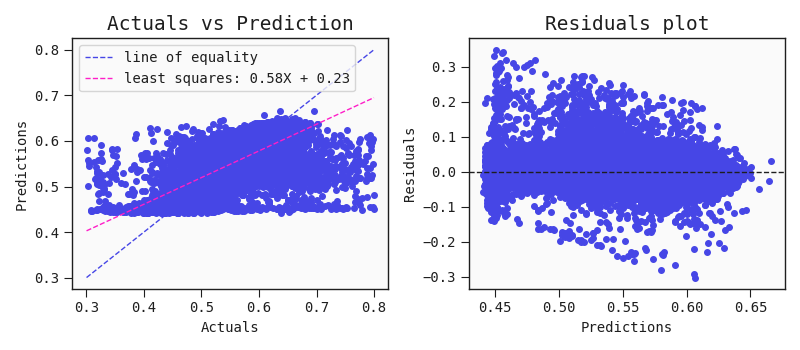
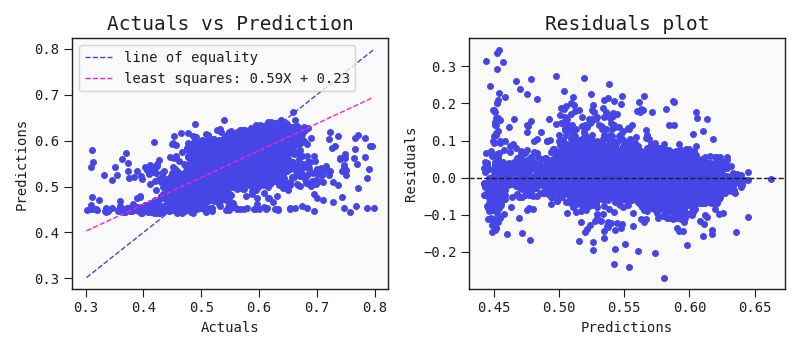

In [ ]:
normal_ch_sysef_df = rain_fil_df[['ch_sysef', 'lift', 'sys_cl', 'ct_tot_kw']]

normal_train, normal_test = split(normal_ch_sysef_df, ratio=[0.8, 0.2], random_state=42)

ql = feyn.QLattice(random_seed=42)

models = ql.sample_models(normal_train.columns, 'ch_sysef', max_complexity=15)

models = feyn.fit_models(models, train, 'absolute_error', 'bic')

models = feyn.prune_models(models)

models = feyn.get_diverse_models(
    models=models,
    n=10
)

normal_model = models[0]
normal_model.plot(
    data=train,
    compare_data=test
)

In [ ]:
root_mean_squared_error(normal_test['ch_sysef'], normal_model.predict(normal_test)) * 100

2.6964212162189876

In [ ]:
interactive_activation_flow(normal_model, normal_train)

interactive(children=(FloatSlider(value=17.307979500000002, description='lift', max=28.346567, min=6.269392), …

<function feyn.plots.interactive._graph_flow.interactive_activation_flow.<locals>.flow(**kwargs)>

In [ ]:
print(len(rain_ch_sysef_df), len(summer_ch_sysef_df), len(fil_df))

12421 39106 189631


In [ ]:
## save model
best.save("best_general.json")
summer_model.save("summer_model.json")
rain_model.save("rain_model.json")
normal_model.save("normal_model.json")

In [3]:
from feyn import Model

In [4]:
normal_model = Model.load("normal_model.json")

In [13]:
for i in range(70, 120, 1):
    print(i/10)

7.0
7.1
7.2
7.3
7.4
7.5
7.6
7.7
7.8
7.9
8.0
8.1
8.2
8.3
8.4
8.5
8.6
8.7
8.8
8.9
9.0
9.1
9.2
9.3
9.4
9.5
9.6
9.7
9.8
9.9
10.0
10.1
10.2
10.3
10.4
10.5
10.6
10.7
10.8
10.9
11.0
11.1
11.2
11.3
11.4
11.5
11.6
11.7
11.8
11.9


In [14]:
res = []
for i in range(70,120,1):
    res.append(normal_model.predict({"ct_tot_kw": (i/10), "sys_cl": 400, "lift":24}))
print(res)

[0.5740195844094911, 0.573855375945284, 0.5736830803323042, 0.5735026193061732, 0.5733139272503607, 0.5731169530145018, 0.5729116618131734, 0.572698037194593, 0.5724760830667349, 0.5722458257663148, 0.5720073161540215, 0.5717606317173014, 0.5715058786599856, 0.571243193956112, 0.570972747343521, 0.5706947432312166, 0.5704094224931603, 0.5701170641201466, 0.5698179867007613, 0.5695125497021838, 0.5692011545218263, 0.5688842452815199, 0.5685623093372191, 0.5682358774789855, 0.5679055237983771, 0.5675718652032511, 0.5672355605634232, 0.5668973094745207, 0.5665578506317108, 0.5662179598096939, 0.565878447450343, 0.565540155864571, 0.5652039560602967, 0.5648707442136767, 0.5645414378059377, 0.5642169714531093, 0.5638982924605791, 0.5635863561385973, 0.5632821209185572, 0.5629865433129803, 0.5627005727645932, 0.5624251464316559, 0.5621611839577488, 0.5619095822745498, 0.5616712104857435, 0.5614469048791217, 0.5612374641122048, 0.5610436446143888, 0.56086615624577, 0.5607056582494928]
